In [66]:
#Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [81]:
cc_data=pd.read_csv("cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,264582,2020-09-27 09:41:48,gas_transport,63.12,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,48.633738,-118.039422
1,350571,2020-11-03 11:29:38,gas_transport,68.82,F,Enola,AR,35.2087,-92.2123,969,1954-01-05,36.179802,-92.650560
2,456043,2020-12-09 16:24:42,home,100.85,F,Orangeburg,NY,41.0442,-73.9609,5950,1971-07-02,41.535820,-73.171710
3,537676,2020-12-28 04:18:11,entertainment,7.84,F,Gadsden,AL,34.0480,-85.9246,67082,1963-02-09,33.307946,-86.376173
4,19760,2020-06-28 10:16:40,misc_pos,16.00,M,Minnesota Lake,MN,43.8295,-93.8282,1087,1963-07-14,44.091922,-93.247544


In [3]:
cc_data["state"].nunique()

50

In [82]:
cc_data[['trans_date', 'trans_time']] = cc_data['trans_date_trans_time'].str.split(' ', n=1, expand=True)
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long,trans_date,trans_time
0,264582,2020-09-27 09:41:48,gas_transport,63.12,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,48.633738,-118.039422,2020-09-27,09:41:48
1,350571,2020-11-03 11:29:38,gas_transport,68.82,F,Enola,AR,35.2087,-92.2123,969,1954-01-05,36.179802,-92.650560,2020-11-03,11:29:38
2,456043,2020-12-09 16:24:42,home,100.85,F,Orangeburg,NY,41.0442,-73.9609,5950,1971-07-02,41.535820,-73.171710,2020-12-09,16:24:42
3,537676,2020-12-28 04:18:11,entertainment,7.84,F,Gadsden,AL,34.0480,-85.9246,67082,1963-02-09,33.307946,-86.376173,2020-12-28,04:18:11
4,19760,2020-06-28 10:16:40,misc_pos,16.00,M,Minnesota Lake,MN,43.8295,-93.8282,1087,1963-07-14,44.091922,-93.247544,2020-06-28,10:16:40


In [85]:

morning_df=cc_data.loc[cc_data["trans_time"]>=]
morning_df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [5]:
category_sum=cc_data.groupby('category')["amt"].sum()
category_df=pd.DataFrame(category_sum)
category_df

,amt
category,
entertainment,47908.70
food_dining,33670.17
gas_transport,67659.56
grocery_net,18965.07
grocery_pos,107104.88
health_fitness,37485.43
home,53318.66
kids_pets,47635.75
misc_net,34290.51


array([<Axes: ylabel=' '>], dtype=object)

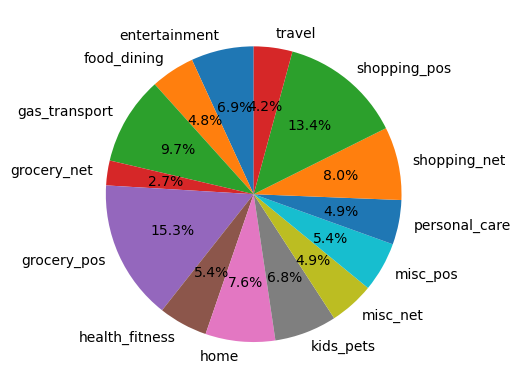

In [38]:
category_df.plot.pie(subplots=True,autopct="%1.1f%%",legend=False,ylabel=" ",startangle=90)

In [30]:
category=pd.DataFrame(cc_data["category"].value_counts())
category

,count
category,
gas_transport,1065
home,979
grocery_pos,934
shopping_pos,908
kids_pets,883
entertainment,740
health_fitness,708
personal_care,694
food_dining,683


array([<Axes: ylabel=' '>], dtype=object)

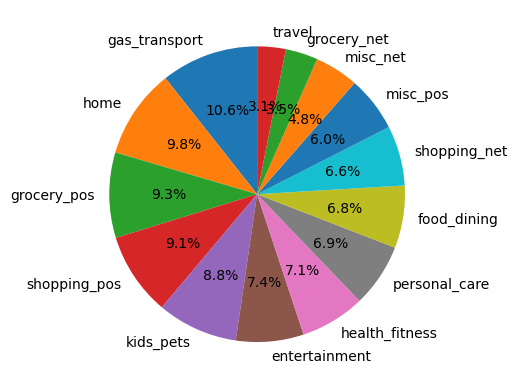

In [31]:
category.plot(kind='pie',subplots=True,autopct="%1.1f%%",legend=False,ylabel=" ",startangle=90)

In [9]:
gender_plot=cc_data.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
gender_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [10]:
alaska_df=cc_data.loc[cc_data["state"]=="AK"]
alaska_df

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
460,507676,2020-12-21 11:39:02,grocery_pos,134.06,M,Wales,AK,64.7556,-165.6723,145,1939-11-09,65.027242,-164.799462
502,132932,2020-08-06 18:33:17,personal_care,4.99,M,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.321425,-165.300357
925,425162,2020-12-02 22:40:11,shopping_net,984.28,M,Craig,AK,55.4732,-133.1171,1920,1997-06-17,54.605711,-133.235980
991,450203,2020-12-08 10:51:37,misc_pos,9.65,M,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.970908,-164.771810
2053,56562,2020-07-11 01:51:35,grocery_net,44.04,M,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.073260,-165.962810
3107,92235,2020-07-23 06:38:11,gas_transport,65.56,M,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.409336,-166.465147
3597,105469,2020-07-27 22:00:48,kids_pets,8.06,M,Wales,AK,64.7556,-165.6723,145,1939-11-09,65.229443,-166.671575
3610,397839,2020-11-24 06:41:44,shopping_pos,8.05,M,Huslia,AK,65.6899,-156.2920,277,1965-11-06,65.468572,-156.249418
3691,283133,2020-10-05 06:15:55,grocery_pos,115.85,M,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.905399,-166.506421
3868,369315,2020-11-11 12:37:27,home,31.51,M,Huslia,AK,65.6899,-156.2920,277,1965-11-06,66.679297,-157.145024


In [11]:
alaska_plot=alaska_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
alaska_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [12]:
continental_df=cc_data.loc[cc_data["state"]!="HI"]
continental_df.head()

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,264582,2020-09-27 09:41:48,gas_transport,63.12,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,48.633738,-118.039422
1,350571,2020-11-03 11:29:38,gas_transport,68.82,F,Enola,AR,35.2087,-92.2123,969,1954-01-05,36.179802,-92.650560
2,456043,2020-12-09 16:24:42,home,100.85,F,Orangeburg,NY,41.0442,-73.9609,5950,1971-07-02,41.535820,-73.171710
3,537676,2020-12-28 04:18:11,entertainment,7.84,F,Gadsden,AL,34.0480,-85.9246,67082,1963-02-09,33.307946,-86.376173
4,19760,2020-06-28 10:16:40,misc_pos,16.00,M,Minnesota Lake,MN,43.8295,-93.8282,1087,1963-07-14,44.091922,-93.247544


In [13]:
continental_df_plot=continental_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
continental_df_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [14]:
contiguos_df=continental_df.loc[continental_df["state"]!="AK"]
contigous_plot=contiguos_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
contigous_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [55]:
contiguos_df=continental_df.loc[continental_df["state"]!="AK"]
contigous_plot=contiguos_df.hvplot.points("merch_long","merch_lat",geo=True,tiles="OSM",color="category",size="amt")
contigous_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [merch_long,merch_lat]   (category,amt)

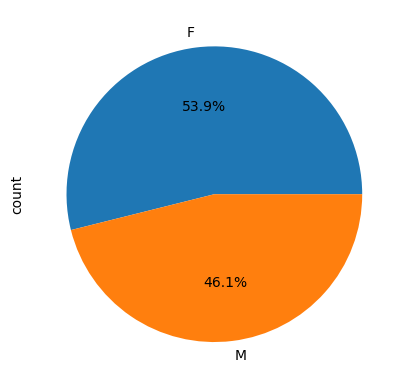

In [52]:
gender_dis=cc_data["gender"].value_counts()
gender_dis.plot.pie(autopct="%1.1f%%")
plt.show()


In [57]:

ts = int('1284101485')


datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')


2010-09-10 06:51:25
